In [1]:
import numpy as np
import pandas as pd
import pywt
import os

In [2]:
#Read demographic file from dataset and create patient dictionary
patient_dict = {}
with open(r"D:\dkuma\Downloads\gait-in-parkinsons-disease\gait-in-parkinsons-disease-1.0.0\demographics.txt", 'r') as file:
    data = file.read().splitlines()
    data.pop(0)
    for line in data:
        linedata = line.split()
        if(linedata[8] == "NaN"):
            patient_dict[linedata[0]] = 0.0
        else:
            patient_dict[linedata[0]] = float(linedata[8])
patient_dict

{'GaPt03': 3.0,
 'GaPt04': 2.5,
 'GaPt05': 2.5,
 'GaPt06': 2.0,
 'GaPt07': 3.0,
 'GaPt08': 2.0,
 'GaPt09': 3.0,
 'GaPt12': 2.0,
 'GaPt13': 2.0,
 'GaPt14': 2.0,
 'GaPt15': 2.0,
 'GaPt16': 2.0,
 'GaPt17': 3.0,
 'GaPt18': 2.0,
 'GaPt19': 2.0,
 'GaPt20': 2.0,
 'GaPt21': 3.0,
 'GaPt22': 2.0,
 'GaPt23': 3.0,
 'GaPt24': 2.5,
 'GaPt25': 2.5,
 'GaPt26': 2.5,
 'GaPt27': 2.0,
 'GaPt28': 2.5,
 'GaPt29': 2.0,
 'GaPt30': 2.0,
 'GaPt31': 2.5,
 'GaPt32': 2.0,
 'GaPt33': 2.5,
 'JuPt01': 2.0,
 'JuPt02': 2.5,
 'JuPt03': 2.5,
 'JuPt04': 2.5,
 'JuPt05': 2.0,
 'JuPt06': 2.5,
 'JuPt07': 3.0,
 'JuPt08': 2.0,
 'JuPt09': 2.5,
 'JuPt10': 3.0,
 'JuPt11': 2.0,
 'JuPt12': 2.5,
 'JuPt13': 3.0,
 'JuPt14': 2.0,
 'JuPt15': 2.5,
 'JuPt16': 2.0,
 'JuPt17': 2.5,
 'JuPt18': 3.0,
 'JuPt19': 2.0,
 'JuPt20': 2.0,
 'JuPt21': 2.5,
 'JuPt22': 2.5,
 'JuPt23': 2.0,
 'JuPt24': 2.5,
 'JuPt25': 2.0,
 'JuPt26': 2.0,
 'JuPt27': 2.0,
 'JuPt28': 2.5,
 'JuPt29': 2.5,
 'SiPt02': 2.5,
 'SiPt04': 2.0,
 'SiPt05': 2.5,
 'SiPt07': 2.0,
 'SiPt08

In [6]:
#read in data from datafiles and store in lists
signals = []
labels = []
for filename in os.listdir(r"D:\dkuma\Downloads\gait-in-parkinsons-disease\gait-in-parkinsons-disease-1.0.0\data"):
    with open(os.path.join(r"D:\dkuma\Downloads\gait-in-parkinsons-disease\gait-in-parkinsons-disease-1.0.0\data",filename), 'r') as file:
        data = file.read().splitlines()
        sig1 = []
        sig2 = []
        sig3 = []
        sig4 = []
        sig5 = []
        sig6 = []
        sig7 = []
        sig8 = []
        for line in data:
            linedata = line.split()
            sig1.append(float(linedata[1]))
            sig2.append(float(linedata[4]))
            sig3.append(float(linedata[5]))
            sig4.append(float(linedata[8]))
            sig5.append(float(linedata[9]))
            sig6.append(float(linedata[12]))
            sig7.append(float(linedata[13]))
            sig8.append(float(linedata[16]))
        tempsig = []
        tempsig.append(sig1)
        tempsig.append(sig2)
        tempsig.append(sig3)
        tempsig.append(sig4)
        tempsig.append(sig5)
        tempsig.append(sig6)
        tempsig.append(sig7)
        tempsig.append(sig8)
        signals.append(tempsig)
        labels.append(patient_dict[filename[0:6]])
labels

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 2.5,
 2.5,
 2.0,
 3.0,
 3.0,
 2.0,
 2.0,
 3.0,
 3.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.0,
 2.0,
 2.0,
 2.5,
 2.5,
 2.5,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.5,
 2.5,
 2.5,
 2.0,
 2.0,
 2.0,
 2.5,
 2.5,
 2.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.0,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 3.0,
 2.0,
 2.5,
 2.5,
 2.5,
 2.5

In [7]:
max = 1000000
maxind = 0

for j, i in enumerate(signals):
    if(len(i[0])<max):
        max = len(i[0])
        maxind = j
print(max, maxind)

4034 114


In [8]:
import matplotlib.pyplot as plt

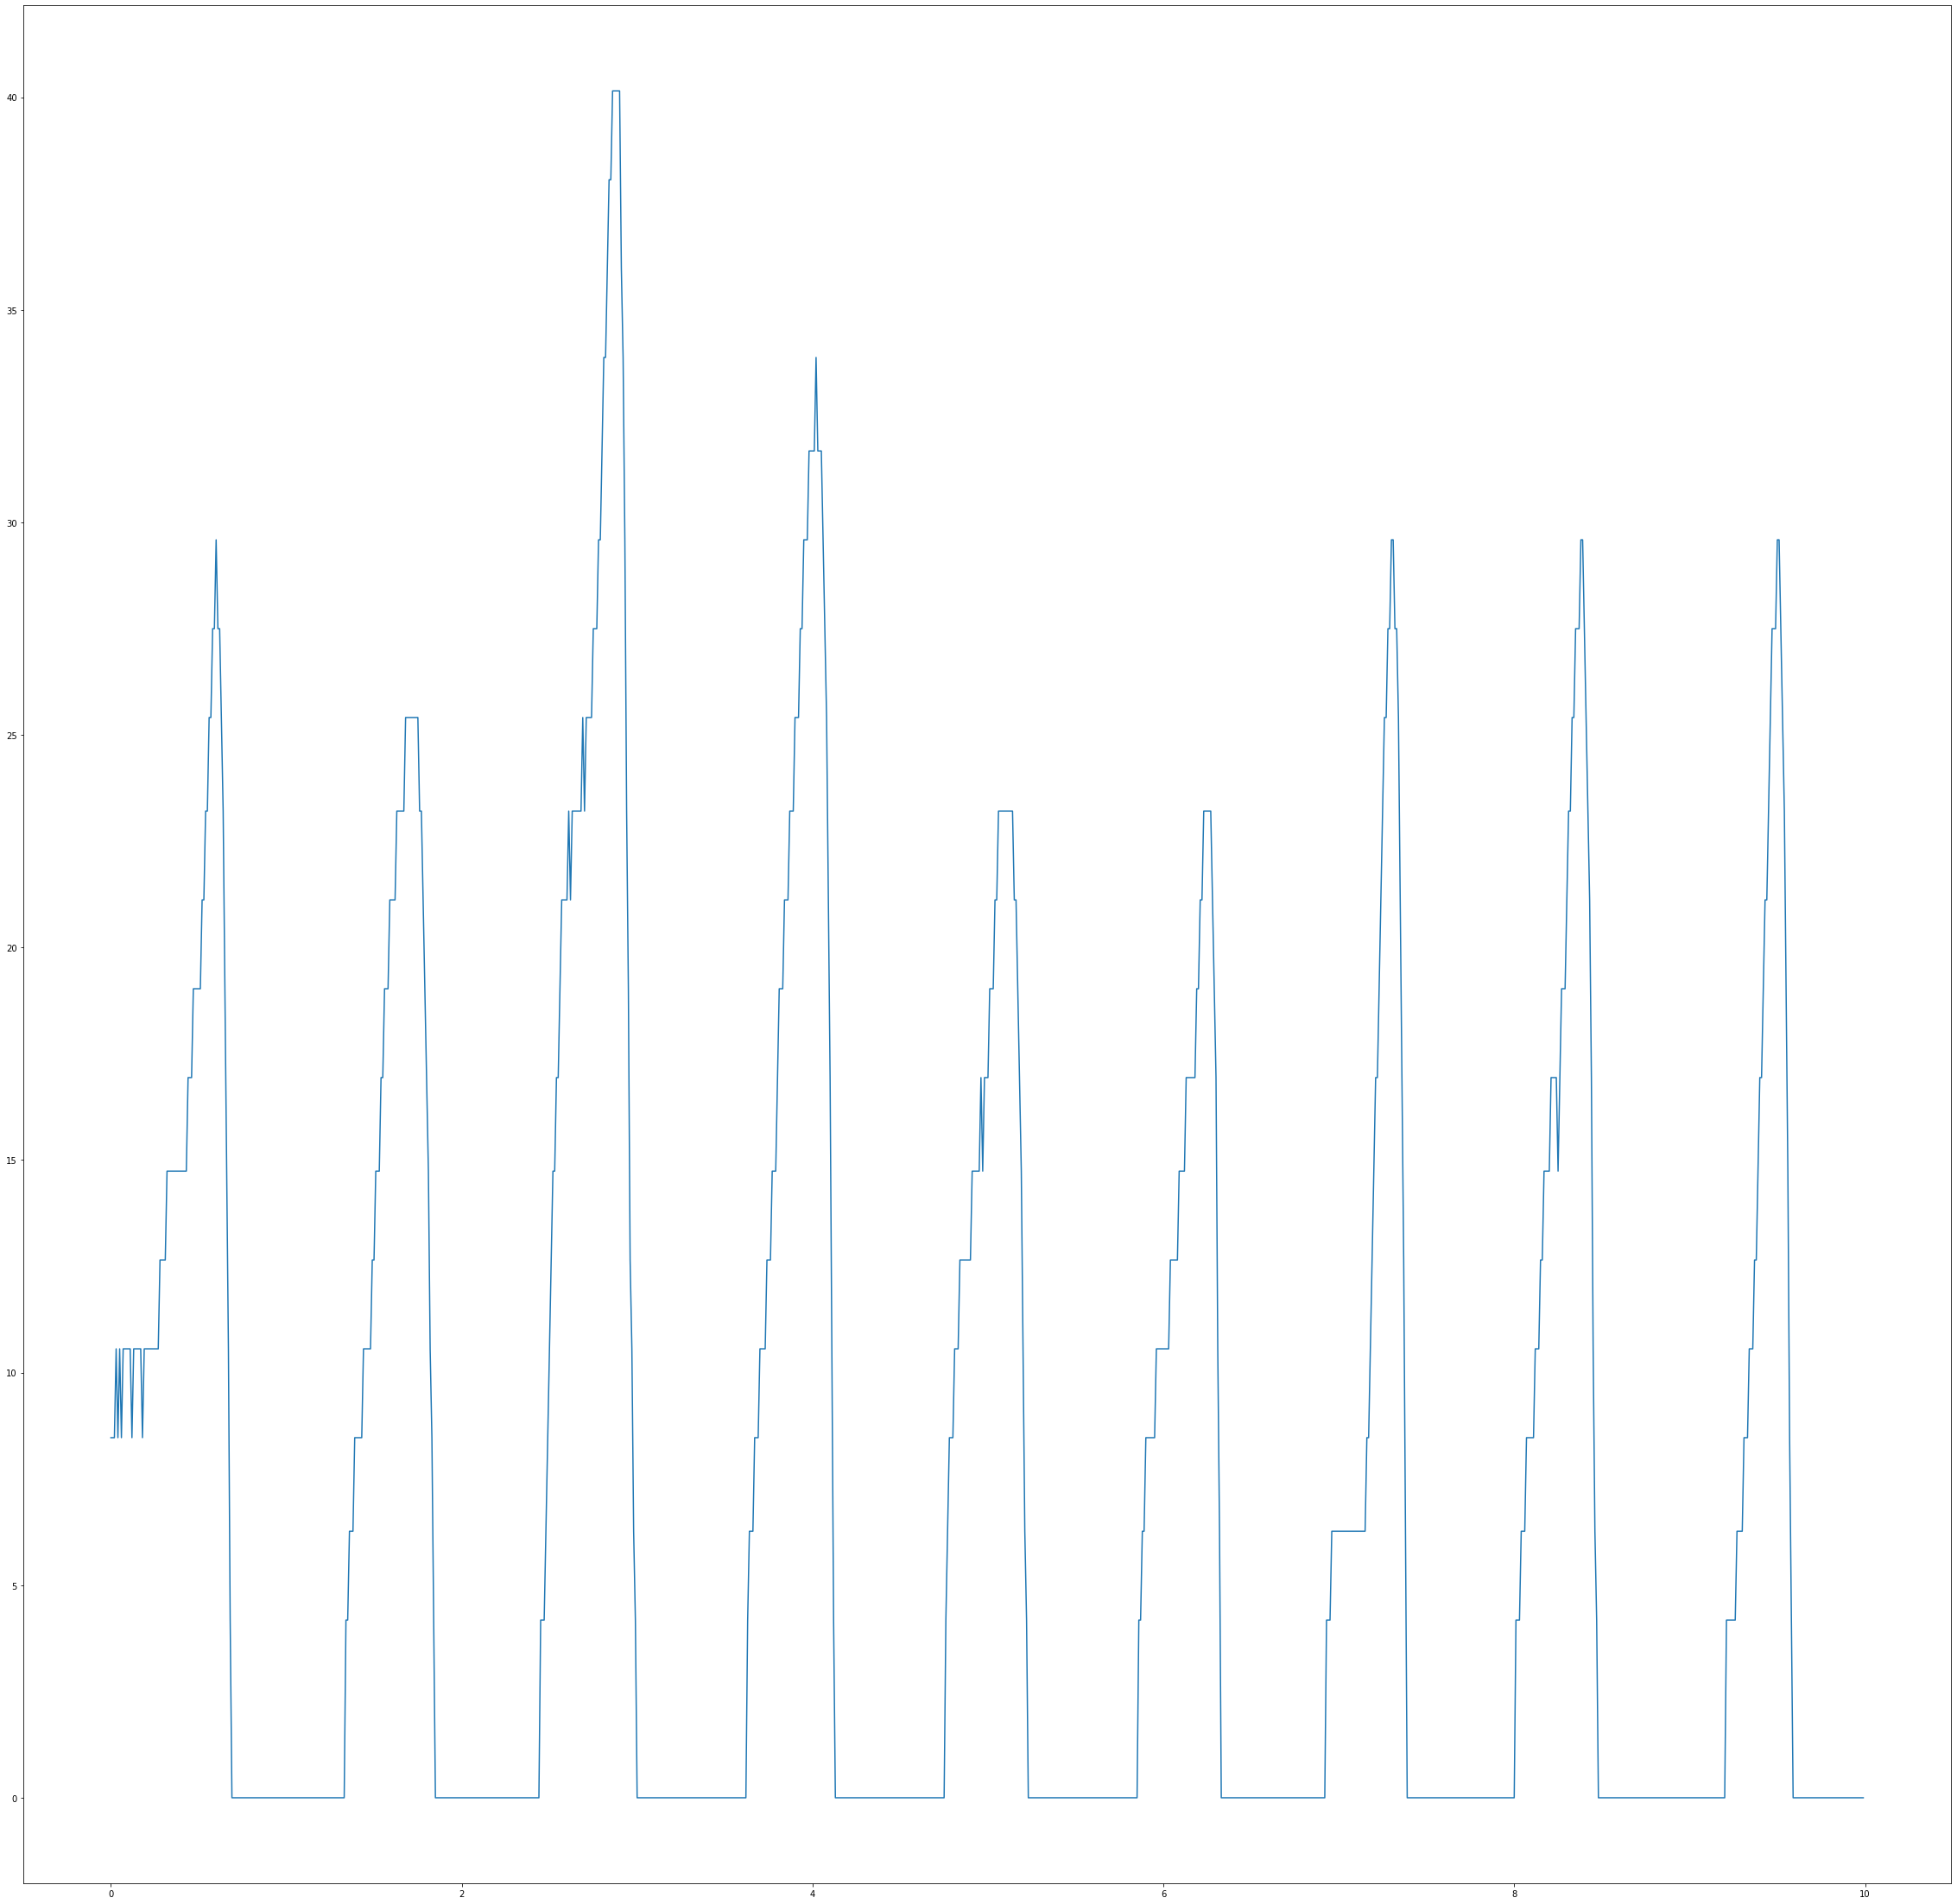

In [9]:
step = 0.01
arr = [0]
for i in range(999):
    arr.append(arr[i]+step)
plt.figure(figsize=(40,40))
plt.plot(arr, signals[1][2][0:1000])

plt.show()

In [10]:
for i in range(len(signals)):
    for j in range(len(signals[i])):
        signals[i][j] = signals[i][j][0:1000]

In [11]:
for i in signals:
    for j in i:
        print(len(j))

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


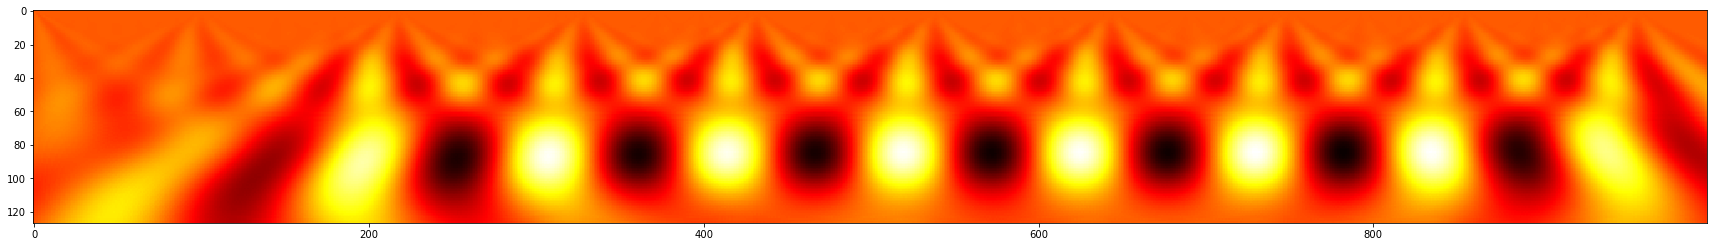

In [12]:
train_data = np.ndarray(shape=(len(signals), 127, 1000, 8), dtype='float32')

for j, signal in enumerate(signals):
    temp_coeffs = []
    for i in range(8):
        coeffs, freq = pywt.cwt(signal[i], range(1, 128), 'morl', 1)
        temp_coeffs.append(coeffs)
    for k in range(len(temp_coeffs)):
        for a in range(len(temp_coeffs[0])):
            for b in range(len(temp_coeffs[0][0])):
                train_data[j, a, b, k] = temp_coeffs[k][a][b]


coeffs, freq = pywt.cwt(signals[120][7], range(1, 128), 'morl', 1)
plt.subplots(figsize=(30,40))
plt.imshow(coeffs, cmap='hot', interpolation='nearest')
plt.show()


In [13]:
#relabel
print(labels)
label_dict = {0: 0, 2.0: 1, 2.5: 2, 3.0: 3}
for i in range(len(labels)):
    if(labels[i]>0):
        labels[i] = 1
    else:
        labels[i] = 0
labels

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 2.5, 2.5, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.0, 2.0, 2.0, 2.5, 2.5, 2.5, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.5, 2.5, 2.5, 2.0, 2.0, 2.0, 2.5, 2.5, 2.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.0, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 3.0, 2.0, 2.5, 2.5, 2.5, 2.5, 2.5, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.5, 3.0, 2.0, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.0, 2.5, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0,

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [14]:
#train test split
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(train_data, labels, test_size=0.2,stratify=labels, random_state=42)

In [15]:
print(X_train[0][1])
print(Y_train)

[[-1.12555456e+00  3.43707926e-03  1.18837126e-01 ... -4.71030071e-05
  -0.00000000e+00 -2.39042789e-02]
 [ 2.60025463e+01  1.27562904e+01  2.10954285e+00 ...  1.22365963e+00
  -0.00000000e+00  9.27671313e-01]
 [-2.41587677e+01 -1.25977011e+01 -1.79414785e+00 ... -1.20678294e+00
  -0.00000000e+00 -1.30249238e+00]
 ...
 [ 1.24264085e+00 -0.00000000e+00 -1.53045406e-07 ...  1.11847677e+01
   1.17592084e+00  3.49129367e+00]
 [-1.77463949e+00 -0.00000000e+00  6.20480600e-09 ... -2.69098263e+01
  -2.46648812e+00 -9.59966660e+00]
 [ 8.93541694e-01 -0.00000000e+00 -6.30370062e-11 ...  2.68204269e+01
   2.49924898e+00  9.96392345e+00]]
[1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 

In [56]:
import keras
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, GlobalAveragePooling2D, MaxPooling2D, Activation
from keras.models import Sequential
from keras.callbacks import History 
history = History()

input_shape = (127, 1000, 8)
 
num_classes = 2
batch_size = 16
epochs = 100

 
Y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
 
 
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2,
                 input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))


model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))


model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))

#model.add(GlobalAveragePooling2D())

model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(2, activation="sigmoid"))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='rmsprop')

model.summary()

callbacks = [history]

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
          validation_data=(x_test, y_test), callbacks=callbacks, verbose=1)
 
train_score = model.evaluate(X_train, Y_train, verbose=0)
print('Train loss: {}, Train accuracy: {}'.format(train_score[0], train_score[1]))
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy: {}'.format(test_score[0], test_score[1]))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 126, 999, 16)      528       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 63, 499, 16)       0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 63, 499, 16)       0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 62, 498, 64)       4160      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 31, 249, 64)       0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 31, 249, 64)       0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 30, 248, 64)     

Epoch 44/100
16/16 [==============================] - 11s 712ms/step - loss: 0.6538 - accuracy: 0.6980 - val_loss: 0.6546 - val_accuracy: 0.6935
Epoch 45/100
16/16 [==============================] - 11s 712ms/step - loss: 0.5872 - accuracy: 0.6961 - val_loss: 0.6455 - val_accuracy: 0.6935
Epoch 46/100
16/16 [==============================] - 11s 710ms/step - loss: 0.6527 - accuracy: 0.7579 - val_loss: 0.6626 - val_accuracy: 0.6452
Epoch 47/100
16/16 [==============================] - 11s 706ms/step - loss: 0.6480 - accuracy: 0.7136 - val_loss: 0.6634 - val_accuracy: 0.6774
Epoch 48/100
16/16 [==============================] - 11s 711ms/step - loss: 0.5289 - accuracy: 0.7850 - val_loss: 0.6653 - val_accuracy: 0.6935
Epoch 49/100
16/16 [==============================] - 11s 716ms/step - loss: 0.6940 - accuracy: 0.7092 - val_loss: 0.6649 - val_accuracy: 0.6935
Epoch 50/100
16/16 [==============================] - 11s 710ms/step - loss: 0.6524 - accuracy: 0.6623 - val_loss: 0.6483 - val_ac